In [1]:
from modules.client import OffVarianceClient
import modules.utils as utils
from pandas import DataFrame
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

C:\Users\user\offvariance\notebooks\modules\utils.py:332: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_03_H_cop'] = df['team1_all_xgpower-03_cop_xg90noindex'] * df['team2_all_xgpower-03_com_xga90index']
C:\Users\user\offvariance\notebooks\modules\utils.py:333: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_03_A_cop'] = df['team2_all_xgpower-03_cop_xg90noindex'] * df['team1_all_xgpower-03_com_xga90index']
C:\Users\user\offvariance\notebooks\modules\utils.py:334: PerformanceWarning: DataFrame is highly fragment

In [2]:
segmented_df = games_df.loc[
    (games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
    (games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
    (games_df['odds_open_tb25'] >= 1.6) & (games_df['odds_open_tb25'] <= 2.5)
    ]

Count: 315
Open profit: -22.866999999999997
Close profit: -23.37
Open ROI: -0.07259365079365078
Close ROI: -0.0741904761904762
UDI: 0.004364418222923343
AxesSubplot(0.125,0.125;0.775x0.755)


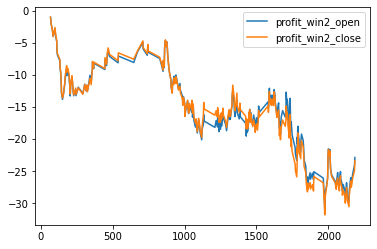

In [3]:
utils.print_away_win_result(segmented_df)

In [4]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
exp_total_03_loc,-0.175954
exp_g_03_A_loc,-0.167200
paper_total_03_loc,-0.152940
exp_total_loc,-0.137089
sum_ufr_03_loc,-0.136787
...,...
exp_g_diff_H_A_zero,0.002467
exp_g_diff_A_H_zero,-0.002467
paper_diff_A_H_loc,-0.001638
paper_diff_H_A_loc,0.001638


In [5]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
exp_g_total_loc_com,2.553104,3.471142,0.918038
exp_g_total_03_loc_cop,2.810346,1.951212,0.859134
exp_g_total_loc_cop,3.487418,2.712840,0.774577
exp_g_diff_A_H_com,0.026467,0.701975,0.675508
exp_g_diff_H_A_com,-0.026467,-0.701975,0.675508
...,...,...,...
exp_g_03_A_zero,0.950513,0.972970,0.022457
exp_g_03_A_loc_zero,1.002931,1.016487,0.013555
exp_g_total_zero,2.170754,2.178764,0.008011
exp_g_A_loc_zero,1.318519,1.312415,0.006104


In [6]:
updated_segmented_df = segmented_df.loc[
    (segmented_df['exp_diff_03_A_H_loc'] >= 0.41) & (segmented_df['exp_diff_03_A_H'] >= 0.37)
    ]

utils.analyze_avg_udi(updated_segmented_df, [
    'exp_diff_03_A_H_loc',
    'exp_diff_03_A_H',
], 'udi_win2')

,low,high,diff
exp_diff_03_A_H_loc,0.720448,0.820537,0.100089
exp_diff_03_A_H,0.585123,0.644537,0.059414


Count: 14
Open profit: 3.46
Close profit: 1.8500000000000005
Open ROI: 0.24714285714285714
Close ROI: 0.13214285714285717
UDI: 0.09444441778215582
AxesSubplot(0.125,0.125;0.775x0.755)


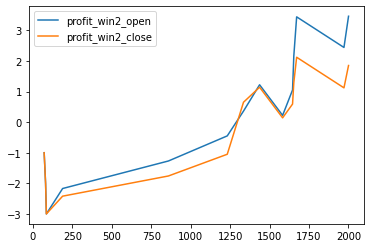

In [7]:
filtered_result_df = segmented_df.loc[
    (segmented_df['exp_diff_03_A_H_loc'] >= 0.82) & (segmented_df['exp_diff_03_A_H'] >= 0.645)
    ]
utils.print_away_win_result(filtered_result_df)